In [8]:
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
img_width, img_height = 224, 224  


In [10]:
model=tf.keras.models.load_model('../SBIR_model.keras')

with open('../features_list.pkl', 'rb') as f:
    features_array=pickle.load(f)

with open('../image_paths.pkl', 'rb') as f:
    relative_image_paths = pickle.load(f)

In [11]:
def extract_features(img_path, model):
    try:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
        img_data = tf.keras.preprocessing.image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        print(img_data)
        img_data = tf.keras.applications.vgg16.preprocess_input(img_data)
        features = model.predict(img_data)
        return features.flatten()
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None

In [12]:
def find_similar_images(input_img_path, features_array, relative_image_paths, model, top_n=10, threshold=0.45):
    input_features = extract_features(input_img_path, model)
    if input_features is None:
        print("Failed to extract features from input image.")
        return []

    similarities = cosine_similarity([input_features], features_array)[0]
    top_indices = np.argsort(similarities)[::-1][:top_n]
    top_similarities = similarities[top_indices]

    # Filter results based on threshold
    filtered_results = [(relative_image_paths[i], similarities[i]) for i in top_indices if similarities[i] >= threshold]

    if not filtered_results:
        print("No similar image found.")
        return []
    
    return filtered_results

In [13]:
def show_similar_images(similar_images, dataset_path):
    if not similar_images:
        print("No images to display.")
        return
    plt.figure(figsize=(15, 10))
    for i, (rel_path, similarity) in enumerate(similar_images):
        try:
            img_path = os.path.join(dataset_path, rel_path)  # Reconstruct absolute path
            img = Image.open(img_path)
            plt.subplot(2,5, i + 1)
            plt.imshow(img)
            plt.title(f"Similarity: {similarity:.4f}")
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {rel_path}: {e}")
        plt.show()

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step


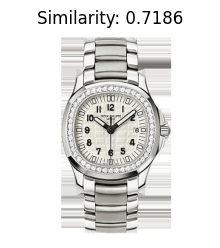

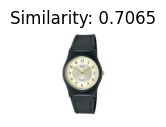

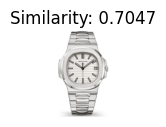

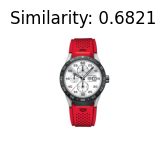

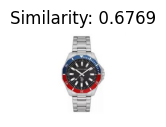

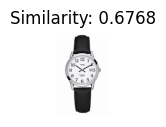

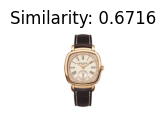

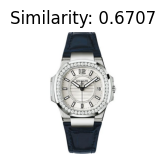

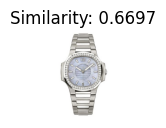

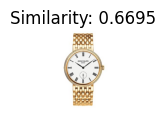

In [14]:
input_image_path = r'F:\Final SBIR\backend\model\test\images.png'
dataset_path=r'..\Dataset'


absolute_image_paths = [os.path.join(dataset_path, rel_path) for rel_path in relative_image_paths]

similar_images = find_similar_images(input_image_path, features_array, relative_image_paths, model, threshold=0.45)
show_similar_images(similar_images, dataset_path)